In [24]:
# -*- coding: utf-8 -*-
#import cv2
import matplotlib.pyplot as plt
from matplotlib import style
style.use('grayscale')
import numpy as np
from scipy.stats import multivariate_normal

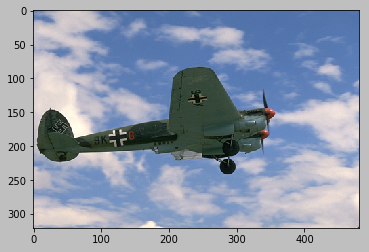

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread("Semantic dataset100/image/3063.jpg")
imgplot = plt.imshow(img)
plt.show()

In [26]:
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
X.shape

(154401, 3)

In [30]:
class GMM:
    def __init__(self, X, number_of_sources, iterations): # number_of_sources: num of clusters
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.img = img
        self.mu = None
        self.pi = None
        self.cov = None

    """Define a function which runs for iterations, iterations"""

    def run(self):
        self.reg_cov = 1e-6 * np.identity(len(self.X[0]))

        """ 1. Set the initial mu, covariance and pi values"""
        # self.mu: nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        self.mu = np.random.randint(min(self.X[:, 0]), max(self.X[:, 0]), size=(self.number_of_sources, len(self.X[0])))
        # self.cov: nxmxm covariance matrix for each source since we have m features (identity matrix)
        self.cov = np.zeros((self.number_of_sources, len(X[0]), len(X[0])))
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim], 100)
        self.pi = np.ones(self.number_of_sources) / self.number_of_sources # initially 1/number of clusters each
        # log_likelihoods: list we store the log likehoods per iteration (check for convergence)
        log_likelihoods = []

        for k in range(self.iterations):
            """E Step"""
            r_ic = np.zeros((len(self.X), len(self.cov)))
            for m, co, p, r in zip(self.mu, self.cov, self.pi, range(len(r_ic[0]))):
                co += self.reg_cov
                mn = multivariate_normal(mean=m, cov=co)
                r_ic[:, r] = p * mn.pdf(self.X)
            for i in range(len(r_ic)):
                r_ic[i] = r_ic[i]/sum(r_ic[i])

                
            #print(k,"/",self.iterations, "iteration done for E Step")

            """M Step"""
            # Calculate the new mean vector and new covariance matrices, 
            # based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []
            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:, c], axis=0)
                mu_c = (1 / m_c) * np.sum(self.X * r_ic[:, c].reshape(len(self.X), 1), axis=0)
                self.mu.append(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1 / m_c) * np.dot((np.array(r_ic[:, c]).reshape(len(self.X), 1) * (self.X - mu_c)).T,
                                                    (self.X - mu_c))) + self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source
                self.pi.append(m_c / np.sum(r_ic))
                
            #print(k,"/",self.iterations, "iteration done for M Step")
            
            #print(self.mu)
            #print(self.cov)
            #print(self.pi)

                
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k * multivariate_normal(self.mu[i], self.cov[j]).pdf(X) 
                                                  for k, i, j in zip(self.pi, range(len(self.mu)), range(len(self.cov)))])))
            
            print(k,"/",self.iterations, "iteration done for EM")

        
        fig2 = plt.figure(figsize=(7, 5))
        ax1 = fig2.add_subplot(111)
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0, self.iterations, 1), log_likelihoods)
        plt.show()

    """draw the output"""

    def predict(self):
        nr = self.img.shape[0]
        nc = self.img.shape[1]
        d = self.img.shape[2]

        likelihood_output = np.zeros_like(self.X, dtype=float)

        for m, co, l in zip(self.mu, self.cov, range(len(likelihood_output[0]))):
            mn = multivariate_normal(mean=m, cov=co)
            prob = []
            #print(m)
            #print(co)
            #print(l)
            for i in range(len(X)):
                prob.append(mn.pdf(self.X[i]))
            likelihood_output[:,l] = prob
    
        pixels = np.zeros_like(self.X)
        pixels[np.arange(len(pixels)), likelihood_output.argmax(1)] = 255
        
        output_img = np.resize(pixels, (nr,nc,d))
        #cv2.imshow('output',output_img)
        #cv2.waitKey(3)
        #cv2.destroyAllWindows()
        
        plt.imshow(output_img)
        plt.show()

0 / 25 iteration done for EM
1 / 25 iteration done for EM
2 / 25 iteration done for EM
3 / 25 iteration done for EM
4 / 25 iteration done for EM
5 / 25 iteration done for EM
6 / 25 iteration done for EM
7 / 25 iteration done for EM
8 / 25 iteration done for EM
9 / 25 iteration done for EM
10 / 25 iteration done for EM
11 / 25 iteration done for EM
12 / 25 iteration done for EM
13 / 25 iteration done for EM
14 / 25 iteration done for EM
15 / 25 iteration done for EM
16 / 25 iteration done for EM
17 / 25 iteration done for EM
18 / 25 iteration done for EM
19 / 25 iteration done for EM
20 / 25 iteration done for EM
21 / 25 iteration done for EM
22 / 25 iteration done for EM
23 / 25 iteration done for EM
24 / 25 iteration done for EM


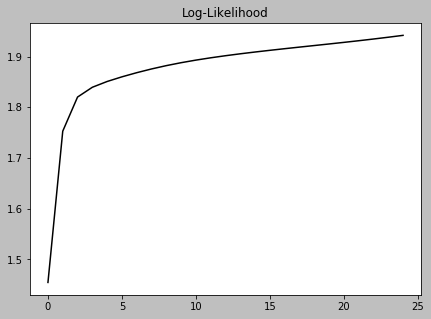

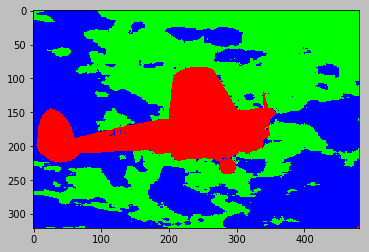

In [28]:
GMM = GMM(X, 3, 25)
GMM.run()
GMM.predict()